In [15]:
import os
import pygmt
import geopandas as gpd
import numpy as np
import pickle
import pandas as pd

In [25]:
geodata = pd.read_csv('data/PARED_paleomap_time3.csv').dropna()
geodata

,r_number,name,biota,type,lon,lat,lon_sco,lat_sco,time
0,1,Tilkideligi Tepe,Calcisponges,Stromatoporoids,30.3833,37.0333,21.39770,9.828540,217.0
1,2,Hydra,Corals,Calcisponges,23.6333,37.3833,20.92680,5.080330,232.0
2,3,"Shiraho, W-Pacific",Corals,Algae,124.2500,24.3333,124.25000,24.333300,0.0
3,4,Aksu-Terziler area,Calcisponges,Stromatoporoids,31.0333,37.8000,26.30430,-0.309389,232.0
4,5,"Adnet, Salzburg",Corals,Calcisponges,13.1667,47.7000,16.42940,32.606900,204.0
...,...,...,...,...,...,...,...,...,...
4305,4374,"core XK-1, Xisha carbonate platform on Shidao ...",Corals,Corals,112.3472,16.8458,112.68900,17.096900,19.0
4306,4375,Jebel Serdj-Bargou,Corals,Rudists,9.5666,36.0833,13.10320,19.927400,121.0
4307,4376,Cruz,Corals,Foraminifera,-0.8621,41.3359,8.65899,32.483000,154.0
4308,4377,Jaulin,Corals,Algae,-0.9908,41.4559,8.62722,32.634600,154.0


In [26]:
paredData = geodata[geodata['time']<265]

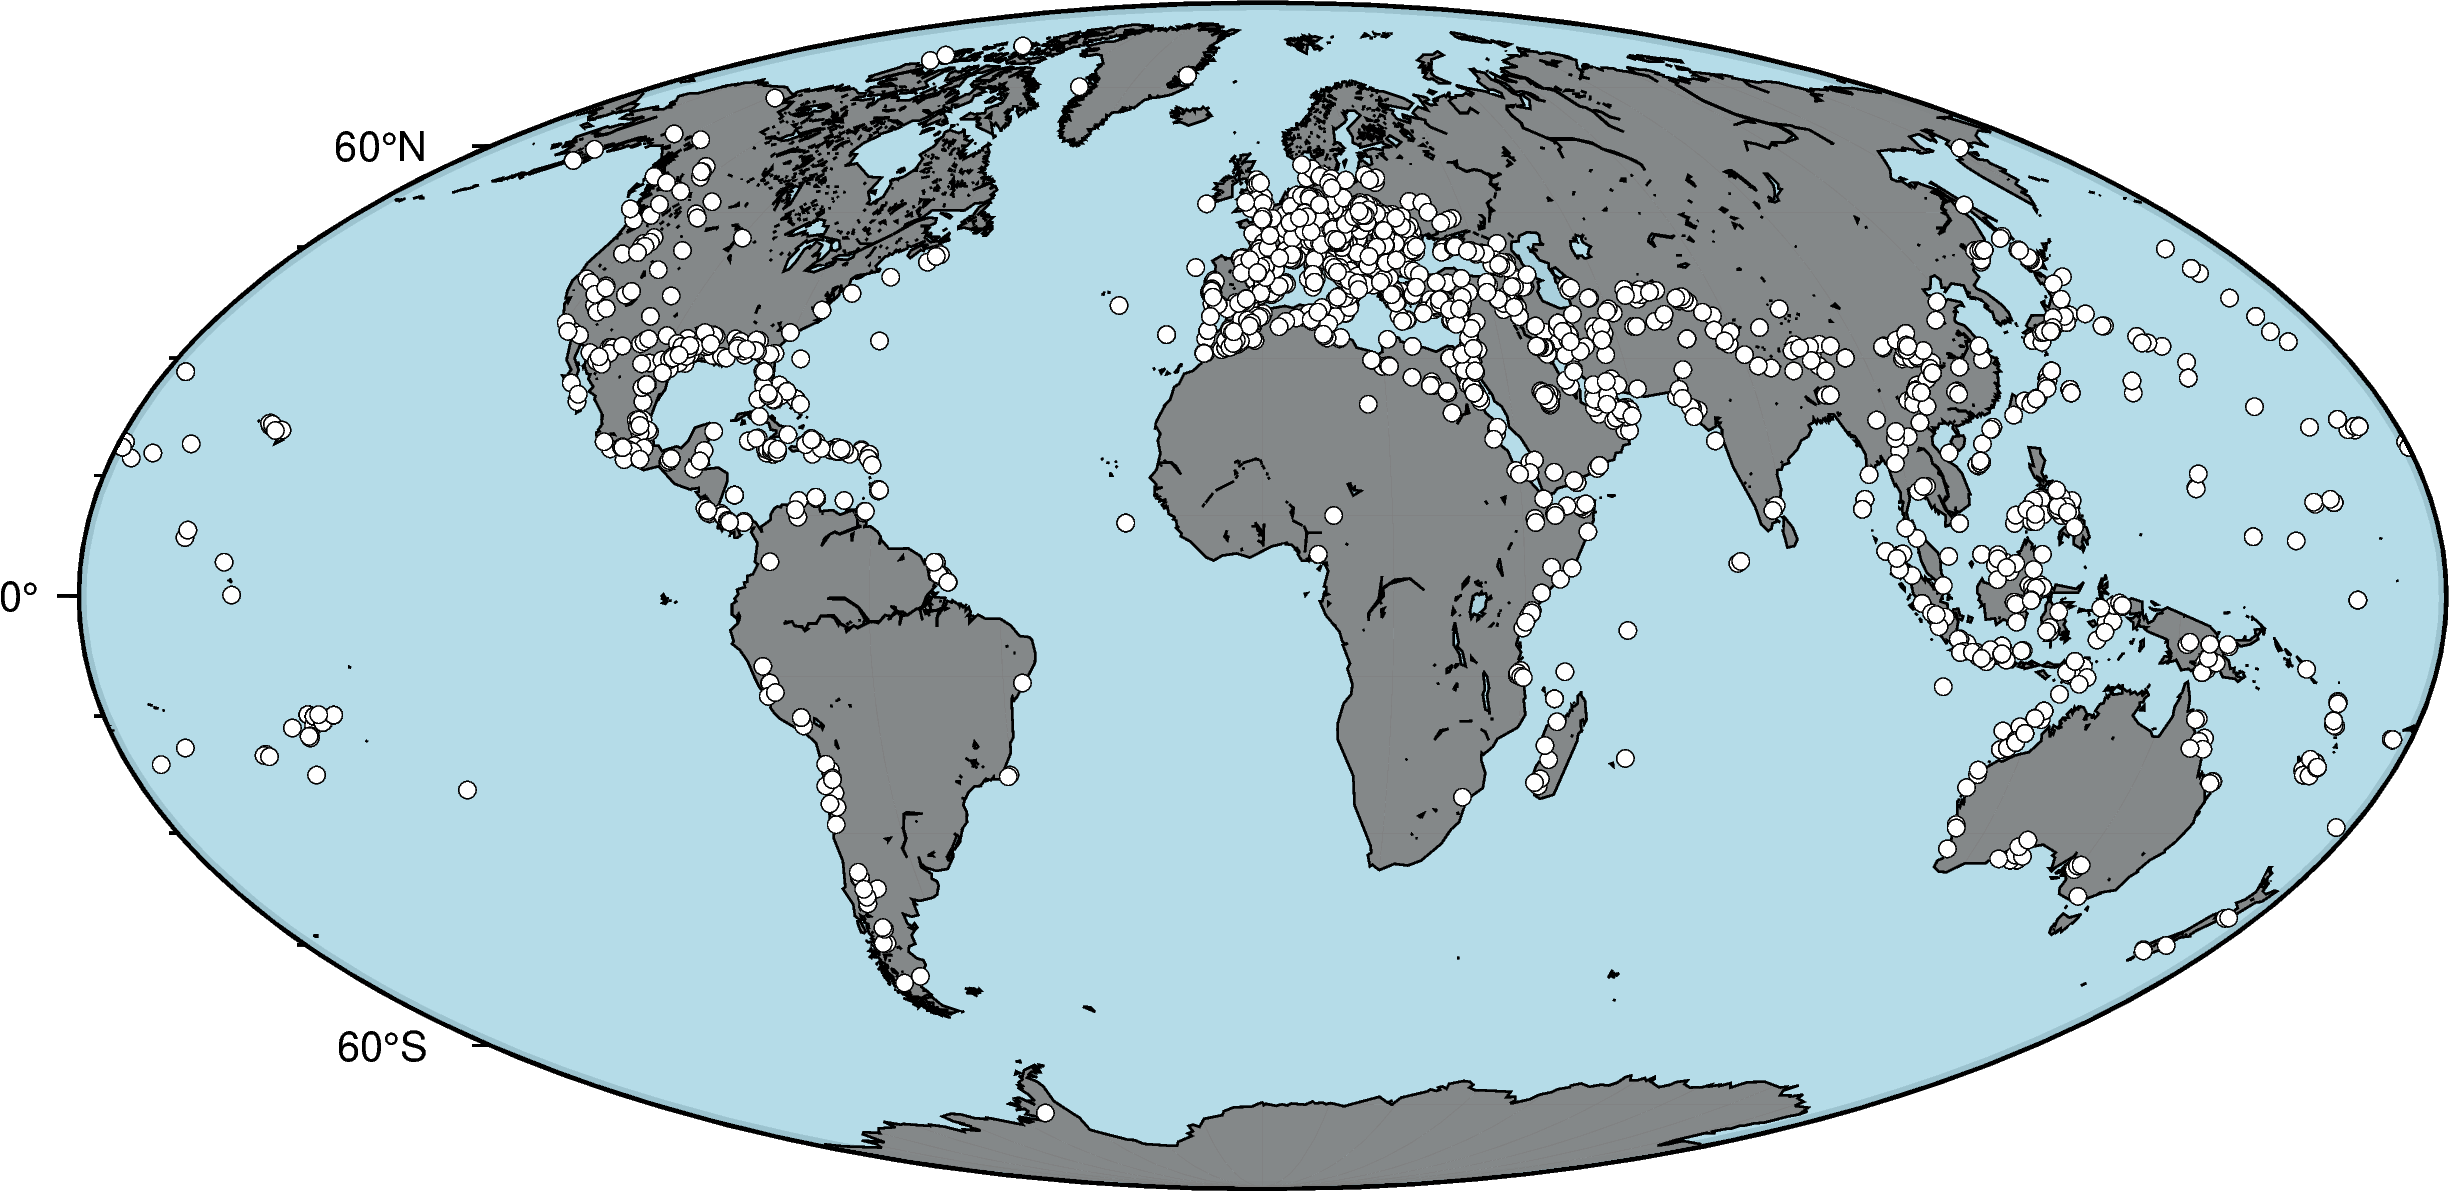

In [35]:
fig = pygmt.Figure()
with pygmt.config(FONT='6p,Helvetica,black',
                  COLOR_FOREGROUND="red", 
                  COLOR_BACKGROUND="blue"):
    fig.basemap(region='d', projection='W12c', frame='af')
    fig.coast(land="gray50", water="#ADD8E6", transparency=10)
    fig.coast(shorelines="0.3p,black") #,borders=["1/0.01p,black"])
    fig.plot(
            x=paredData['lon'],
            y=paredData['lat'],
            style="c0.09c",
            color="white",
            pen="0.1p,black",
#             cmap=True,
#             color=wmean[lands],
        )   
fig.show(width=1000,dpi=500)
# fig.savefig('reconstruct_Present.png',dpi=500)

In [36]:
dt = 5
ntimes = -np.arange(-265,5,dt)
    
curve = 'foster'
with open('pickle/remain_'+curve+'.pkl', 'rb') as f:
    remainDf = pickle.load(f) 
with open('pickle/id2_'+curve+'.pkl', 'rb') as f:
    id2 = pickle.load(f)

getLon = []
getLat = []
getVal = []
for step in range(len(remainDf)):
    getLon.append(remainDf[step]['lon'].values[id2[step]])
    getLat.append(remainDf[step]['lat'].values[id2[step]])
    getVal.append(remainDf[step]['wmean'].values[id2[step]])

In [49]:
listLon = getLon[0].copy()
listLat = getLat[0].copy()
for k in range(1,len(remainDf)):
    listLon = np.hstack((listLon,getLon[k]))
    listLat = np.hstack((listLat,getLat[k]))

In [37]:
# karstShp = "WHYMAP_WOKAM/shp/whymap_karst__v1_poly.shp"

# gdf = gpd.read_file(karstShp)
# gdfContinuous = gdf[gdf['rock_type']==1]
# gdfDiscontinuous  = gdf[gdf['rock_type']==2]

# gdfContinuous.to_file('gdfContinuous.gmt', driver='OGR_GMT', )
# gdfDiscontinuous.to_file('gdfDiscontinuous.gmt', driver='OGR_GMT', )

In [38]:
gdfContinuous = gpd.read_file('gdfContinuous.gmt', driver='OGR_GMT')
gdfDiscontinuous = gpd.read_file('gdfDiscontinuous.gmt', driver='OGR_GMT')

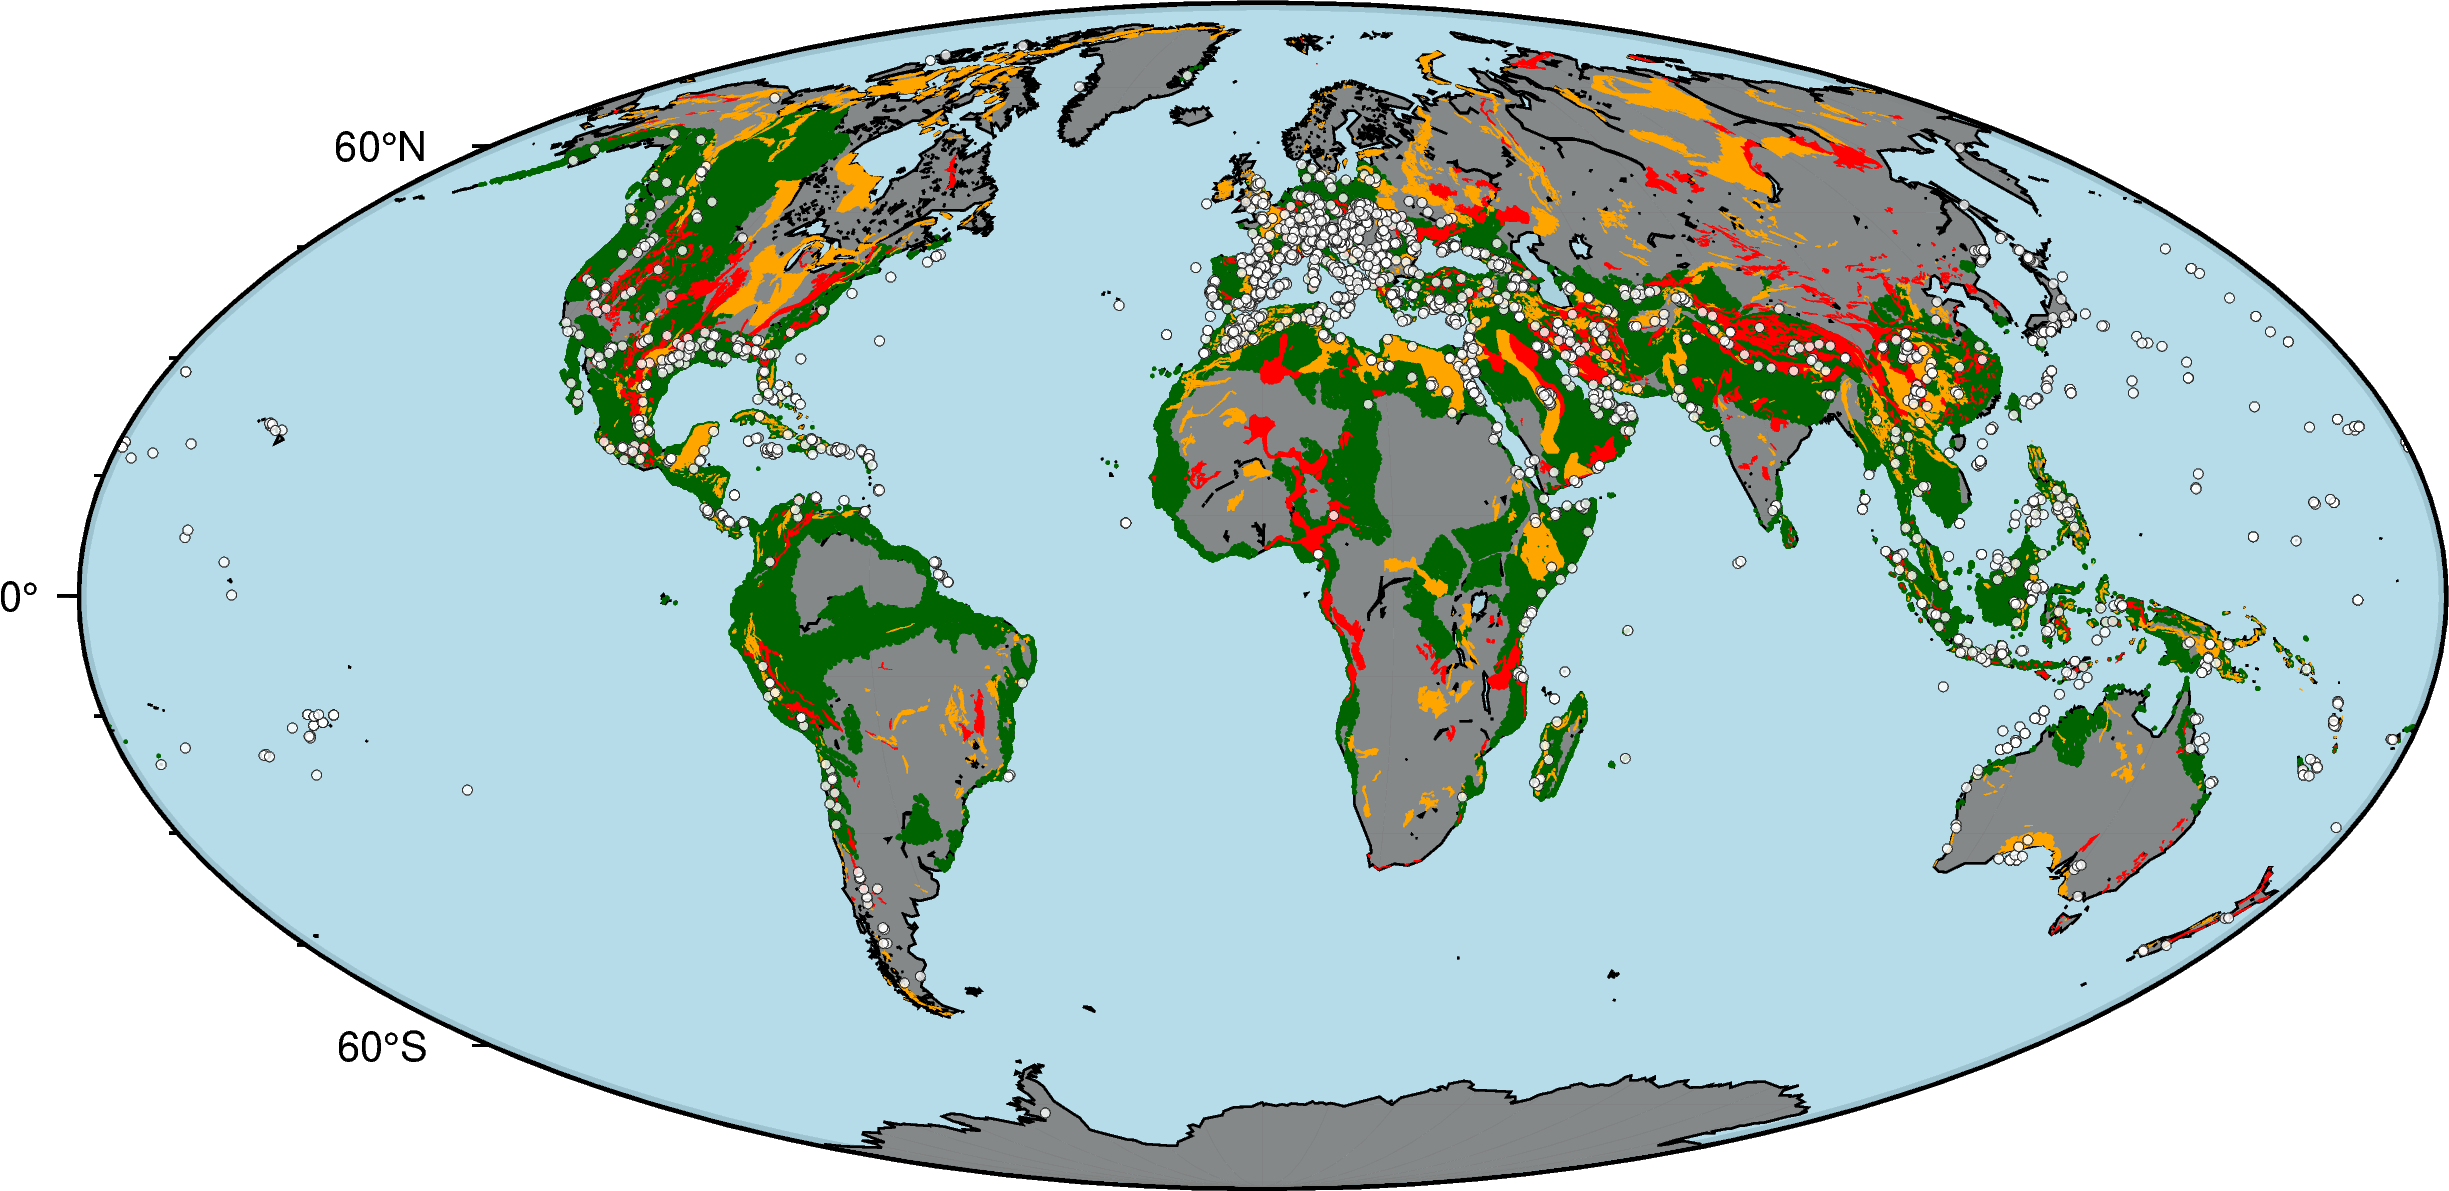

In [55]:
fig = pygmt.Figure()
with pygmt.config(FONT='6p,Helvetica,black',
                  COLOR_FOREGROUND="red", 
                  COLOR_BACKGROUND="blue"):
    fig.basemap(region='d', projection='W12c', frame='af')
    fig.coast(land="gray50", water="#ADD8E6", transparency=10)
    fig.coast(shorelines="0.3p,black") #,borders=["1/0.01p,black"])
    fig.plot(x=listLon[::10],y=listLat[::10],style="c0.02c",color='darkgreen')
    fig.plot(data=gdfContinuous,color='orange')
    fig.plot(data=gdfDiscontinuous,color='red')
    fig.plot(
            x=paredData['lon'],
            y=paredData['lat'],
            style="c0.05c",
            color="white@20",
            pen="0.01p,black@20",
        )
fig.show(width=1000,dpi=500)
fig.savefig('reconstruct_Present.png',dpi=500)